
# Support Vector Reressor SVR2

In [12]:
# Support Vector Reressor SVR
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Importing the dataset
dataset=pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\20_April\1.SVR\Position_Salaries.csv')

In [14]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X=dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [16]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [22]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""
'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#for feature sclling we called the class standardscaler from skleran.preprocessing
sc_X = StandardScaler()
sc_y = StandardScaler()
#created 2 objectas sc_X & sc_y 
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))
#y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))
#finall what we have to do is fit & transform method to scale the entire dataset 
'''
#On above part you created 2 separate standard scaler object & each matrix fitted to the separate objects so you couldn't create 1 object and create
#after feature scaling int datatype can convert into float thats why you got some warning error

'\n# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\n#for feature sclling we called the class standardscaler from skleran.preprocessing\nsc_X = StandardScaler()\nsc_y = StandardScaler()\n#created 2 objectas sc_X & sc_y \nX = sc_X.fit_transform(X)\n#y = sc_y.fit_transform(y)\ny = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))\n#y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))\n#finall what we have to do is fit & transform method to scale the entire dataset \n'

In [17]:
# Fitting SVR to the dataset
from sklearn.svm import SVR

In [18]:
#imported the svr class from SKLEARN.SVM library
regressor = SVR(kernel='poly', degree=3, gamma='auto')
regressor.fit(X, y)
#regressor created properly with default parameter after execute the above line of code
#now we will check what was the actual salary after scaling 

SVR(gamma='auto', kernel='poly')

In [19]:
# Predicting a new result
y_pred=regressor.predict([[6.5]])
y_pred
#y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
#we will see what is predicted salary for the 6.5yrs of exp new employee
#always check the next argument function by select the object inspector
#you have to transform the 6.5 numerical value transform and fit to the regressor 
#we have to do the inverse transform to get the orginial scale & by using the inverse_transform then we will get the scaled prediction salary
#after execute we get very great prediction we found the predicted sal is 170k which is too good
#we can say that our svr model quite good model compare to polynomial regression, finally we can say that svr is great model



array([197014.65753968])

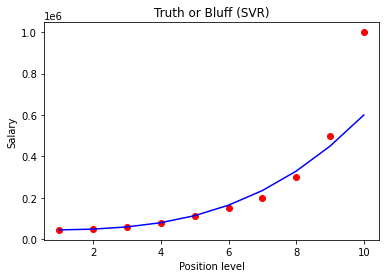

In [20]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
#why wrong prediction happened hear & why we got the blue straight line we got hear
#lets look at this & on this cases we have to do the feature scaling 
#lets see the code with feature scaling technique

#if you check the output that is svr model & its predicting the each of the real observation
#red points are real observation point & blue lines are predicted line & now you can say svr is fitted much better curve on the dataset
#same hear if you check the ceo actual observation point but you will find as still we can improve the graph and lets see how can we do that in svr
#in this case ceo is outlier hear becuase ceo is quite far from our observation, thats ok

#what exactly we are doing hear to check the what exactly employees have 6.5yrs experience predict salary


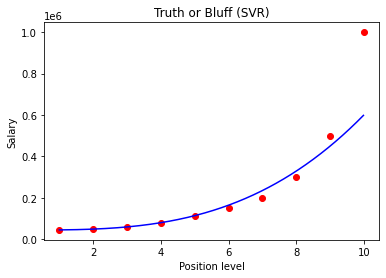

In [21]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()